# Nuclear electron diffraction

*from the AQA A-level physics specification (September 2015 onwards)*
> Students should be familiar with the graph of intensity against angle 
> for electron diffraction by a nucleus

<!-- This will get SI unitx to work (somewhat) -->
$$\newcommand{\SI}[2]{{#1}~\mathrm{#2}}
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\renewcommand{\vec}[1]{\mathbf{#1}}
$$

Elastic scattering of electrons from nuclei gives a measure of the size of the nuclear charge distribution.  The electrons are scattered by the electric force field of the nucleus, and re-emerge with no loss of kinetic energy.  This is described by particle physics as a coherent interaction of virtual photons (mediating the electromagnetic force) with the nucleus as a whole, and thus it provides a probe of the global properties of the nucleus, such as its charge radius.

Here is the usual setup (a hand drawn diagram with a slighly dodgy graph curve shape, but showing the main features, from [revise.im](https://revise.im/physics/unit-5/radioactivity)):
![Cyberphysics graph](electrondiffraction/electronbeam.png)

Electrons are an ideal probe because 
- they interact via the electromagnetic force
- they are not absorbed by the nucleus
- the electromagnetic force is weak (compared to the nuclear force between nucleons), so the electron easily penetrates into the nucleus
- electron beams of very high intensity can be made and used (meaning decent measurements can be made even for angles where there is a low probability of scattering)

The graph we are aiming for here should look something like this one, another dodgy curve from [Cyberphysics](http://www.cyberphysics.co.uk/Q&A/KS5/Nuclear/radius/nuclearRadiusQ6.html).

![Cyberphysics graph](electrondiffraction/6graphans.png)

Things to note (as labelled on the graph):
- there are oscillations, due to the diffraction of the electron wave, and these are directly related to the size of the charge distribution of the target nucleus
- the oscillations are less pronounced than those seen in the diffraction of light by a black disc, since the nucleus doesn't have a sharp edge or appear black to the electron wave
- the first minimum is *not* at zero

## Understanding the form of the graph

When waves pass through a collection of spheres, which 'look' like circles to the oncoming waves, they diffract around them in the same way as through holes of the same size (this is an example of [Babinet's principle](https://en.wikipedia.org/wiki/Babinet%27s_principle)). This means that they produce a diffraction pattern with the first minimum at $$\sin\theta = 1.22 \frac{\lambda}{D},$$ where $D$ is the diameter of the sphere
(this may be familiar from the [Rayleigh resolution criterion](https://en.wikipedia.org/wiki/Angular_resolution#Explanation) which states that two point sources of equal intensity can just be resolved with diffraction limited optics if separated by in angle by $1.22\lambda/D$).

It is definitely important to understand and be able to explain at least qualitatively the relationship between angle minima and radius; think about the diffraction of light by aperture.

Here are some typical data taken from [Bellicard et al. Phys. Rev. Letts 19 (1967) 527](https://doi.org/10.1103/PhysRevLett.19.527), showing cross sections for elastic scattering of $757~\mathrm{MeV}$ electrons from $^{40}\mathrm{Ca}$ and $^{48}\mathrm{Ca}$. Notice that data were taken over several orders of magnitude. The cross section shows diffraction-like patterns with minima as suggested by analogy with light diffracting from an aperture. Notice that the minima for $^{48}\mathrm{Ca}$ are slightly lower in angle than for $^{40}\mathrm{Ca}$, due to its lightly larger radius.

![Typical data for two isotopes of calcium](electrondiffraction/calciumscattering-bellicard.gif)

The graph is not quite as simple as straightforward diffraction of light from a circular aperture, though: there is also an overall decrease of the scattered electron intensity with angle owing to Rutherford scattering (due to electrostatic interaction: the fact that the force is attractive rather than repulsive is not important).  The graph below (from [Teaching advanced physics](http://tap.iop.org/atoms/quarks/538/page_47382.html)) compares a typical electron diffraction pattern with the Rutherford scattering pattern and the single slit pattern. 

![Rutherford diffraction overlay graph](electrondiffraction/tapimg.gif)


## Getting some data

This proved to be rather tricky, as most of the original papers on electron diffraction by nuclei are behind paywalls of big journal publishers like AnnualReviews, APS, ScienceDirect, Elsevier, SpringerLink.  I had to visit Cambridge University Library, who have access (got to Cambridge: they've got a great [Physics Department](https://www.phy.cam.ac.uk/) and you get access to a [legal deposit library](https://en.wikipedia.org/wiki/Legal_deposit#United_Kingdom) for life).  I now have a good number of downloaded PDFs of the original research, with banners like "Access provided by Cambridge University. For personal use only."

To reproduce a graph similar to the AQA specimen "electron diffraction by a nucleus" graph (so not as many oscillations as Ca, just one $\theta_\mathrm{min}$ before a subsiduary maximum), I chose the data from Carbon for $374.5~\mathrm{MeV}$ electrons which are tabulated in [I. Sick and J.S. McCarthy *Nuclear Physics* A150 (1970) pp.631-654](https://doi.org/10.1016/0375-9474%2870%2990423-9).

Using gnuplot:
```
set logscale y
set xlabel 'angle theta / degrees'
set ylabel 'cross section / (mb / sr)'  
plot 'carbon375.dat' u 1:2:3 w yerrorbars ps 0
```

![first plot of Carbon 375.5 MeV data](electrondiffraction/carbon375.png)

## Making a fit

### Rutherford scattering

First let's look at what the cross section would look like if the electrons were purely undergoing Rutherford scattering.

The Rutherford scattering formula for scattering in a potential $U(r)=-\frac{\alpha}{r}$ is
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\left(\frac{\alpha}{4E\sin^2\frac{\theta}{2}}\right)^2.$$
In this case, $\alpha=\frac{6e^2}{4\pi\varepsilon_{0}}$ and $E=374.5~\mathrm{MeV}$, so the function to plot becomes
\begin{align*}
\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}&=\left(\frac{\frac{6e^2}{4\pi\varepsilon_{0}}}{4E}\right)^2\mathrm{cosec}^4\frac{\theta}{2}\\
&=\left(\frac{\frac{1}{4\pi\varepsilon_{0}}\times 6e^2}{4E}\right)^2\mathrm{cosec}^4\frac{\theta}{2}\\
&=\left.\left(\frac{9\times 10^{9}~\mathrm{N.m^2.C^{-2}}\times 6 \times (1.6\times 10^{-19}~\mathrm{C})^2}{4\times 374.5\times 10^6~\mathrm{eV}\times 1.6\times 10^{-19}~\mathrm{J/eV}}\right)^2 \middle/ \left(\sin\frac{\theta}{2}\right)^4 \right.\\
&=\left.\left(\frac{9\times 10^{9} \times 6 \times 1.6\times 10^{-19}}{4\times 374.5\times 10^6 }\right)^2 \middle/ \left(\sin\frac{\theta}{2}\right)^4 \right. ~ \mathrm{m^2}
\end{align*}

The units on the plot for carbon are mb (millibarns).  The barn (symbol b) is the standard unit for measuring a nuclear cross section (denoted as $\sigma$).  It is equal to $10^{-28}~\mathrm{m^2}$, approximately the cross-sectional area of a uranium nucleus (the unit came about as physicists working on the [Manhattan project](https://en.wikipedia.org/wiki/Manhattan_Project) needed a secretive unit for cross section, and they chose the approximate area of uranium, considered a large target nucleus, rather like a barn door in the phrase "couldn't hit the broad side of a barn" for someone who is a poor shot).  To convert, we use $$1~\mathrm{mb} = 10^{-31}~\mathrm{m^2}$$

We can thus add a "Rutherford" line to our plot with

```
f(x) = ( 9e9 * 6 * 1.6e-19 / (4 * 374.5e6) ) **2 / (1e-31 * ( sin (x * 2 * pi / 720 ) )**4 )
replot f(x)
```

![Rutherford line + data](electrondiffraction/rutherford.png)


### Electron diffraction

Next we'll have a look at the form the graph would take if the electrons behaved like light diffracting from an aperture.

The intensity of light at a diffraction angle $\theta$ from a circular aperture is given by Hecht *Optics* as
$$ I(\theta) = I(0) \left[ \frac{ 2J_{1}(ka\sin\theta) }{ ka\sin\theta } \right]^2, $$
where $k$ is the *wave number* (equal to $2\pi/\lambda$) and $a$ is the radius of the aperture.  $J_{1}$ is a *Bessel function* of order 1:
$$J_{1}(u)=\frac{i^{-1}}{2\pi}\int^{2\pi}_0 e^{i(v+u\cos v)} \mathrm{d}v. $$

Before plotting the graph, we need to find $k$ and $a$ for the experiment.  Since the energy of the electrons ($\SI{374.5}{MeV}$) is large compared to the rest energy of an electron ($0.511~\mathrm{MeV}$), we can ignore the ${m_0}^2c^4$ term in $E^2={m_0}^2c^4+p^2c^2$ and thus use the "ultrarelativistic limit" $E=pc$.  The de Broglie relation for wavelength $\lambda=h/p$ then becomes $\lambda = hc/E$, meaning $k$ is given by
$$k=\frac{E}{\hbar c}.$$
NB $\hbar$ (pronounced "h-bar") is called the "reduced Planck constant". It is equal to the Planck constant divided by $2\pi$ - it's often useful to absorb a factor of $2\pi$ into the Planck constant.

$a$, the radius of the nuclei, can be estimated from the equation for the first minimum in the diffraction pattern for a circular aperture at $$\sin\theta = 1.22 \frac{\lambda}{D},$$ where $D$ is the diameter of the sphere.  $a$ is thus given by
$$a = 0.61 \frac{\lambda}{\sin\theta_{\mathrm{min}}}.$$
Putting in some values,
\begin{align*}
a &= 0.61 \frac{hc/E}{\sin(58.0^\circ)}\\
&= 0.61 \frac{6.63\times10^{-34}\mathrm{J.s}\times 3\times10^8~\mathrm{m.s^{-1}}/374.5\times 10^6~\mathrm{eV}\times 1.6\times 10^{-19}~\mathrm{J/eV}}{\sin(58.0^\circ)}\\
&= 2.39\times10^{-15}~\mathrm{m}.
\end{align*}

Luckily, gnuplot has a built-in function for ```besj1(x)``` (radians) for the ```j_1``` bessel function of ```x```.  So we can add a "diffraction line to our plot with"
```
g(x) = (2 * besj1 (1.9 * 2.39 * sin(2*pi*x/360) ) / ( 1.9 * 2.39 * sin(2*pi*x/360) ) )**2
replot g(x)
```

![diffraction line + Rutherford line + data](electrondiffraction/rutherford-diffraction.png)

The combined effect of these (```replot f(x) * g(x)```) is a fairly good fit for the data, certainly for smaller angles, and into the first minimum area:

![Best fit so far](electrondiffraction/ruthdiffcombofit.png)

However, there are still problems, notably:
- The cross section at the first minimum gets dragged down to zero by the first zero of the Bessel function
- The position of the first subsiduary maximum is not correctly predicted
- The fit for angles above the first minimum is not particularly good

Although the "Rutherford" and "diffraction" lines have a physical motivation, how to combine these pictures is unclear (and simple multiplication doesn't seem appropriate as it has the problems noted above).


## In search of a better fit

The scattering of beams of particles by nuclei is at heart an important class of question, which can be solved by means of quantum mechanics.  The problem is one in which a substance contains $n$ scattering centres of force per unit volume.  A particle moves through the substance, and we wish to know the probability, per length $x$ of its path, that the particle is scattered through and angle $\theta$ into the solid angle $\mathrm{d}\Omega$.

For the important case where the potential $V(r) = Z_1Z_2e^2/r=-\alpha/r$, corresponding to the non-relativistic scattering of particles of charge $Z_1$ ($Z_1=2$ for $\alpha$ particles, $Z_1=-1$ for electrons) by a bare nucleus of charge $Z_2e$, quantum mechanics gives the same formula as classical mechanics (this happens in this case alone):
$$\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_\mathrm{Rutherford}=\left(\frac{\alpha}{4E\sin^2\frac{\theta}{2}}\right)^2.$$

For a more general field $V(r)$, or in the case where the wavelengths of the virtual photons of the EM interaction are not much larger than the radius of the proton, each small element of volume of the scattering potential scatters waves, the subsequent amplitudes of which must be summed over the potential extent in order to find the scattering cross section at a particular point.  This is very difficult, and so approximate methods are used, for example in the case of high energy electrons, the approximate method of finding the scattering probability is known as the *Born approximation* (it is in essence just the use of the first-order $\bra{\psi_f}V(r)\ket{\psi_i}$ term in the perturbation theory expansion, i.e. assuming that the incident wave is not seriously distorted by the scattering potential).

When the Born approximation fails, a more accurate method is needed to solve the scattering problem.  One such method, applicable to a spherically symmetrical potential, is to expand the wave function into partial waves and use a *phase shift analysis* to account for the distortion of the incident wave by the scattering potential.

### Born approximation

For nuclei of small $A$ (and therefore small nuclear charge and scattering potential), the Born approximation is capable of giving a reasonably good account of the measured $\mathrm{d}\sigma/\mathrm{d}\Omega$, with good agreement with the data except near the diffraction minimum.

Account is taken of the ultrarelativistic nature of the electrons by using free particle eigenfunctions obtained from the Dirac equation, instead of the Schrödinger equation, to evaluate the matrix elements entering into the Born approximation.  

#### Mott scattering

If Rutherford scattering is the low-energy limit of $\mathrm{e^-p}$ scattering when $E\ll m_{\mathrm{e}}$ (so the electron is non-relativistic), then Mott scattering is the limit of electon&ndash;proton scattering where the electron is relativistic but the proton recoil still can be neglected, i.e. $m_\mathrm{p}\ll E\ll m_\mathrm{e}$. (NB $m_\mathrm{p}=\SI{938.3}{MeV}$.) The cross section is again calculated from first-order perturbation theory for a point-like object with potential $V(r)=-\alpha/r$ as
$$\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_\mathrm{Mott}=\frac{\alpha}{4E^2\sin^4\frac{\theta}{2}}\cos^2\frac{\theta}{2}.$$

In practice, this doesn't change the fit to our Carbon data that much: the fit is still in good agreement with the data for low angles, and quite significantly above the measured data for angles above the first diffraction minima.

#### Form factor

The next step is to introduce a *form factor*, to account for the fact that the charge distribution is not point-like, as we have so far assumed, but instead has a finite extent.

The cross section for a point-like scatterer is modified by a form factor, so the final scattering cross section is expressed as a product of the cross section for a point-like target multiplied by the square of the form factor:
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\left(\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}\right)_\mathrm{point-like}\lvert F(\theta)\rvert^2$$

NB Thus far, we have effectively assumed a form factor of
$$F(\theta)=\left[ \frac{ 2J_{1}(ka\sin\theta) }{ ka\sin\theta } \right].$$

The form factor accounts for phase differences between contributions to the scattered wave from different points of the charge distribution (note that these phase differences, and thus departure of the form factor from the point-like target form, will be larger for larger scattering angles, and this explains the better fit of the Mott distrubution at lower angles).

![Phase differences motivating the form factor in elastic scattering](electrondiffraction/phasedifference.png)

If the wavelength of the electron is much larger than the radius of the nucleus, the contributions to the scattered wave from each point in the charge distribution will be in phase and therefore add constuctively.  When the wavelength is smaller than the radius of the nucleus (and this must be the case for our electrons, in order for them to be able to probe nuclear structure), the phases of the scattered waves will have a strong dependence on the positions of the part of the charge distribution responsible for the scattering.  In this case, when integrated over the entire charge distribution, the negative interference between different contributions greatly reduces the total amplitude.

If the charge density of the nucleus is written as $Q\,\rho(\vec{r})$, where $Q$ is the total charge and $\rho(\vec{r})$ is the charge density distribution normalized so that
$$\int\rho(\vec{r})\mathrm{d}^3\vec{r}=1.$$
The potential at a displacement $\vec{x}$ from the origin, written in terms of this charge density is thus
$$V(\vec{x})=\int\frac{Q\rho(\vec{r})}{4\pi|\vec{x}-\vec{r}|}\mathrm{d}^3\vec{r}.$$

Now, in the Born approximation, the form factor is given by
$$F(\vec{q}^2)=\int\rho(\vec{r})e^{i\vec{q}\cdot\vec{r}}\mathrm{d}^3\vec{r},$$
where $\vec{q}$ is the momentum-energy transfer by the electron in the scattering process ($\vec{q}=\vec{p}_\mathrm{i}-\vec{p}_\mathrm{f}$)&mdash;a quantity which is relativistically invariant and is very important in electron-scattering studies&mdash;and its magnitude is related to the scattering angle by
$$\hbar|\vec{q}|=2p\sin\frac{\theta}{2},$$
where $p$ is the momentum of the incident electron.

The form factor $F(q^2)$ is the three-dimensional Fourier transform of the charge density $\rho$.  For a spherically symmetric charge distribution, integration over the angle between the vectors $\vec{q}$ and $\vec{r}$ gives
$$F(q)=\frac{4\pi}{q}\int^\infty_0 \rho(r)\sin(qr)r\mathrm{d}r.$$

Nuclei like $^{12}\mathrm{C}$ in the p-shell can be described on the basis of a shell model theory by charge distributions of the type
$$ \rho(r) = \frac{2}{\pi^{3/2}}\frac{1}{b^{3}(2+3\alpha)}\left(1+\frac{\alpha r^2}{b^2}\right)e^{-r^2/b^2},$$
where the root-mean-square radius $a$ (the Harmonic Well model is well fit with a value of $\SI{2.42\times10^{-15}}{m}$ for $^{12}\mathrm{C}$) of the charge distribution is given by
$$a=kb=b\left[\frac{3(2+5\alpha)}{2(2+3\alpha)}\right]^{1/2},$$
and where the form factor is
$$F(x)=\left[1-\frac{\alpha x^2}{2k^2(2+3\alpha)}\right]\exp\left(\frac{-x^2}{4k^2}\right).$$
In the expressions above,
$x=qa$, $Z$ is the atomic number, and $\alpha = (Z-2)/3$ (for example, $\alpha=4/3$ for $^{12}\mathrm{C}$.


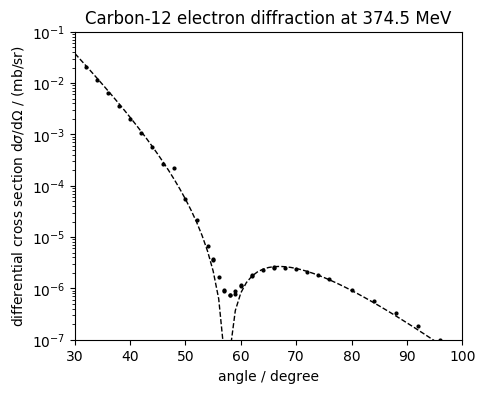

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e

# get the experimental data
theta, cs, cserr = np.loadtxt('electrondiffraction/carbon375.dat', usecols=(0,1,2),unpack=True)

# Constants
from scipy.constants import e # electronic charge
from scipy.constants import epsilon_0
from scipy.constants import c
from scipy.constants import hbar
coulomb = 1 / (4 * np.pi * epsilon_0) # 1/4 pi varepsilon_0

Z = 6
E = 374.5e6 * e
alpha = coulomb * Z * e**2

# Rutherford scattering
def ruth (theta, energy, alpha):
    dcs = alpha ** 2 / ( 16 * E**2 * ( np.sin(np.deg2rad(theta/2)) )**4 )
    return dcs

def mott (theta, energy, alpha):
    dcs = 4 * ruth (theta, energy, alpha) * (np.cos(np.deg2rad(theta/2)))**2
    return dcs

def form (theta, energy, Z):
    a = 2.42e-15 # rms radius from p.51 of Herman & Hofstadter
    p = E / c
    q = 2 * p * np.sin(np.deg2rad(theta/2)) / hbar
    aleph = (Z-2)/3 # this is alpha on p.50 of Herman & Hofstadter
    k = (3*(2+5*aleph)/(2*(2+3*aleph)))**0.5
    x = q * a
    form = (1 - aleph * x**2 / (2 * k**2 * (2+3*aleph)) ) * np.exp(-x**2/(4*k**2))
    return form

dcs = mott(angles, E, alpha) * form(angles, E, Z)**2 /1e-31

angles = np.linspace(1,100,100)

#let's make a function to convert apparent to absolute magnitudes
#def app2abs (apparent, dist):
#    absolute = apparent - 5 * (np.log10(dist/10))
#    return absolute

# PLOTTING FROM HERE ON DOWN
fig, ax = plt.subplots(figsize=(5, 4))

ax.set_yscale("log", nonposy='clip')

plt.rcdefaults()
ax.plot(theta, cs, 'ko' , markersize=2)
ax.plot(angles, dcs, 'k--' , linewidth=1)
plt.ylim(1e-7,0.1)
plt.xlim(30,100)

plt.title('Carbon-12 electron diffraction at 374.5 MeV')
plt.xlabel('angle / degree')
plt.ylabel('differential cross section $\mathrm{d}\sigma/\mathrm{d}\Omega $ / (mb/sr)')

plt.show()

The agreement with the data is good, except near the minimum.  The Born approximation still heads down to a diffraction zero.

### Phase shift analysis

The above description of the basic formulae of the electron-scattering process is only an approximate one. More exact methods of finding the scattering cross section have been developed, employing the *phase-shift* methods.  These more exact methods are applicable to heavy nuclei as well as light ones.

The qualitative physical ideas involved in the determination of nuclear structure can be adequately described by the Born approximation method. Nevertheless, quantitative results definitely require the more elaborate phase-shift methods and simple, and in this case, closed formulae cannot be given to describe the scattering cross section.

## References

1. John Lilley, *Nuclear Physics: Principles and applications*
1. David Bohm, *Quantum Theory*, Prentice Hall, 1951
1. Eisberg, *Fundamentals of Modern Physics*, John Wiley, 1961
1. Herman and Hofstadter, *High-Energy Electron Scattering Tables*, Stanford University Press, 1960
1. "Robert Hofstadter - Nobel Lecture: The Electron-Scattering Method and Its Application to the Structure of Nuclei and Nucleons". Nobelprize.org. Nobel Media AB 2014. Web. 7 Apr 2018. <http://www.nobelprize.org/nobel_prizes/physics/laureates/1961/hofstadter-lecture.html> 
1. Mark Thomson, *Modern Particle Physics*, Cambridge University Press, 2013
1. Eugene Hecht, *Optics*, 4th edition, Addison Wesley, 2002
1. N.F. Mott, *Elements of Wave Mechanics*, Cambridge University Press, 1962
1. [Bellicard et al. Phys. Rev. Letts 19 (1967) 527](https://doi.org/10.1103/PhysRevLett.19.527)
1. [I. Sick and J.S. McCarthy *Nuclear Physics* A150 (1970) pp.631-654](https://doi.org/10.1016/0375-9474%2870%2990423-9)
